## FUTURE_ML_01 - Sales Forecasting for Retail Business
### Author: [Adnan Rahman Sayeem]

In [1]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
# Step 2: Load the Dataset

df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [3]:
# Step 3: Data Preprocessing

# Check the actual column names first
print(df.columns)

# Check missing values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Convert 'ORDERDATE' to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Group sales by date
sales_data = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# Rename columns for modeling
sales_data.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'}, inplace=True)

# Display the first few rows
print(sales_data.head())

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEA

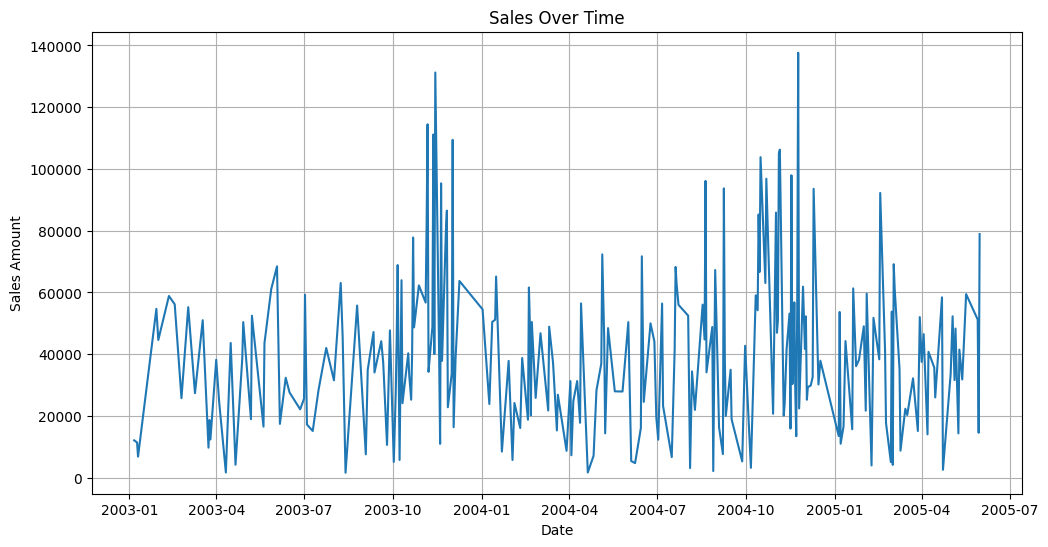

In [4]:
# Step 4: Exploratory Data Analysis (EDA)

plt.figure(figsize=(12,6))
plt.plot(sales_data['ds'], sales_data['y'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()


In [5]:
# Step 5: Build and Train Prophet Model

model = Prophet()
model.fit(sales_data)


23:32:04 - cmdstanpy - INFO - Chain [1] start processing
23:32:04 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Step 6: Make Future DataFrame

future = model.make_future_dataframe(periods=180)  # 6 months


In [7]:
# Step 7: Forecast Future Sales

forecast = model.predict(future)


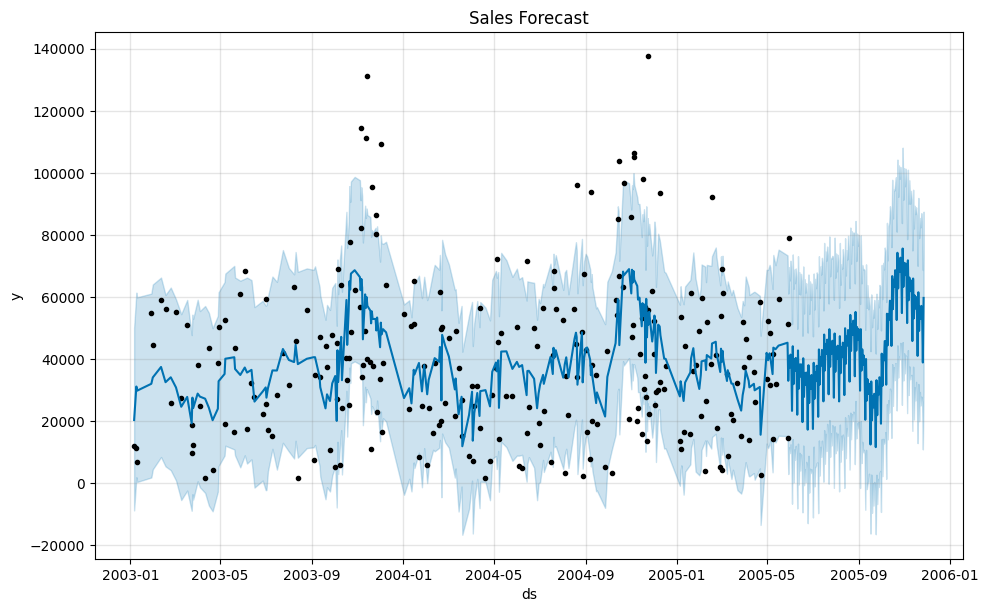

In [8]:
# Step 8: Plot the Forecast

fig1 = model.plot(forecast)
plt.title('Sales Forecast')
plt.show()


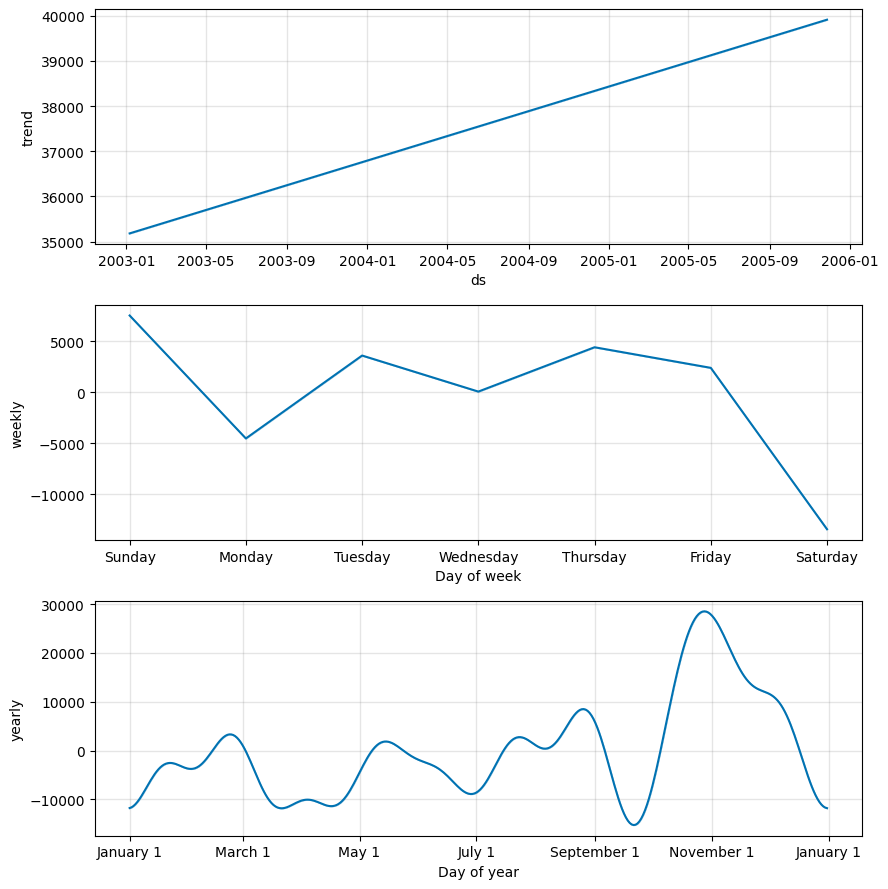

In [9]:
# Step 9: Plot Seasonality Components

fig2 = model.plot_components(forecast)
plt.show()


In [10]:
# Step 10: Train-Test Split for Evaluation

# 80% Train, 20% Test
split_index = int(len(sales_data) * 0.8)
train = sales_data.iloc[:split_index]
test = sales_data.iloc[split_index:]

# Model Training
model = Prophet()
model.fit(train)

# Create only the test dates for prediction (not future dates)
future_test = test[['ds']]  # Just use test dates!

# Predict
forecast_test = model.predict(future_test)

# Merge forecast with real test data
forecast_test_filtered = forecast_test[['ds', 'yhat']]
forecast_test_filtered = forecast_test_filtered.set_index('ds')
test = test.set_index('ds')

# Optional: Merge for comparison
results = test.join(forecast_test_filtered)

print(results.head())


23:32:05 - cmdstanpy - INFO - Chain [1] start processing
23:32:05 - cmdstanpy - INFO - Chain [1] done processing


                   y          yhat
ds                                
2004-12-17  37905.15  47924.477119
2005-01-05  13529.57  50122.983199
2005-01-06  53690.93  48798.250781
2005-01-07  11021.30  48355.980785
2005-01-10  16628.16  41622.893419


In [11]:
# Step 11: Evaluate the Model

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['y'], forecast_test_filtered['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], forecast_test_filtered['yhat']))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 19815.74
Root Mean Squared Error (RMSE): 23827.22


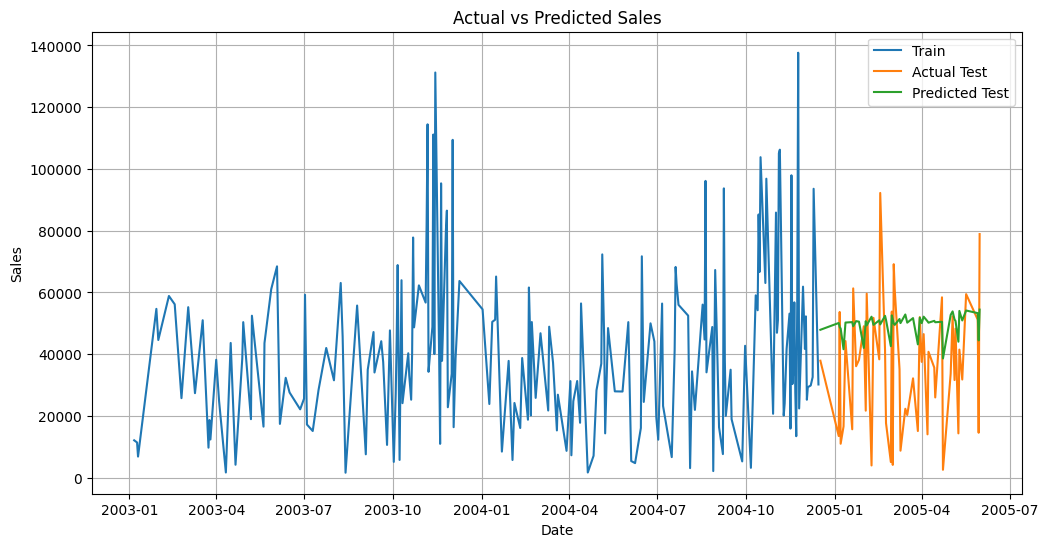

In [12]:
# Step 12: Plot Actual vs Predicted Sales

plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test.index, test['y'], label='Actual Test')
plt.plot(test.index, forecast_test_filtered['yhat'], label='Predicted Test')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Step 13: (Optional) Save Forecasted Results

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecasted_sales.csv', index=False)


## 📊 Advanced Graphs for Sales Forecasting Analysis

In [14]:
# Additional imports for advanced graphs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 🔥 Correlation Heatmap

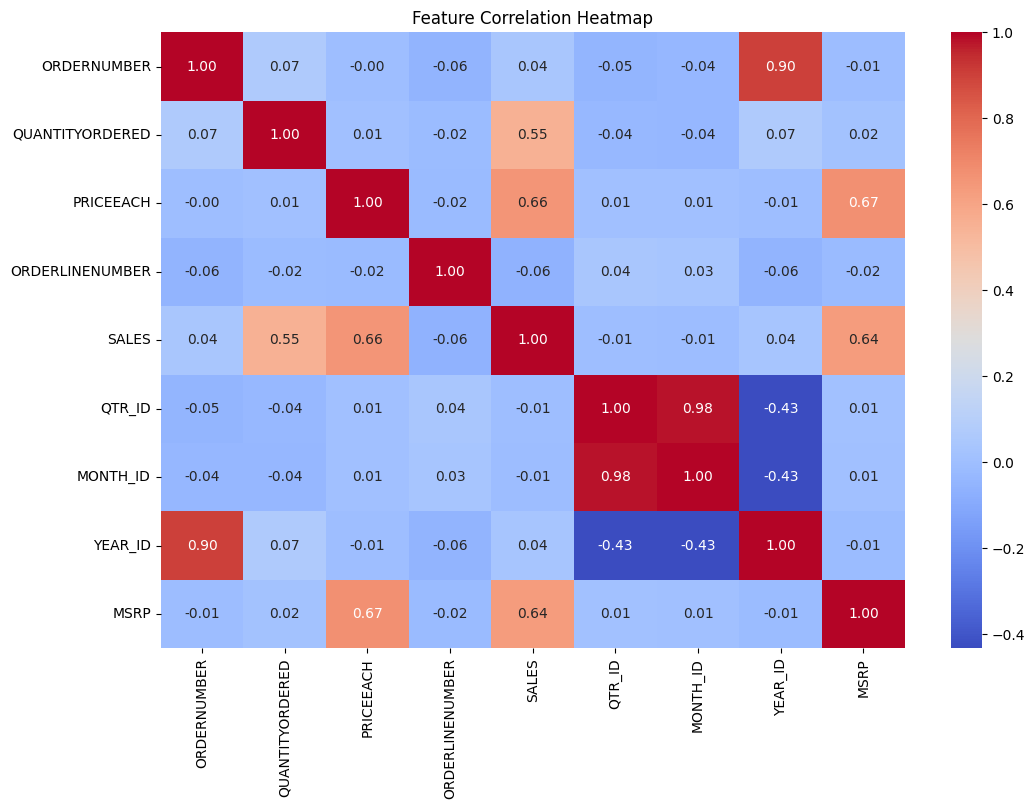

In [15]:
# Compute correlation matrix ONLY on numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Keep only number columns
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


### 📈 Moving Average of Sales

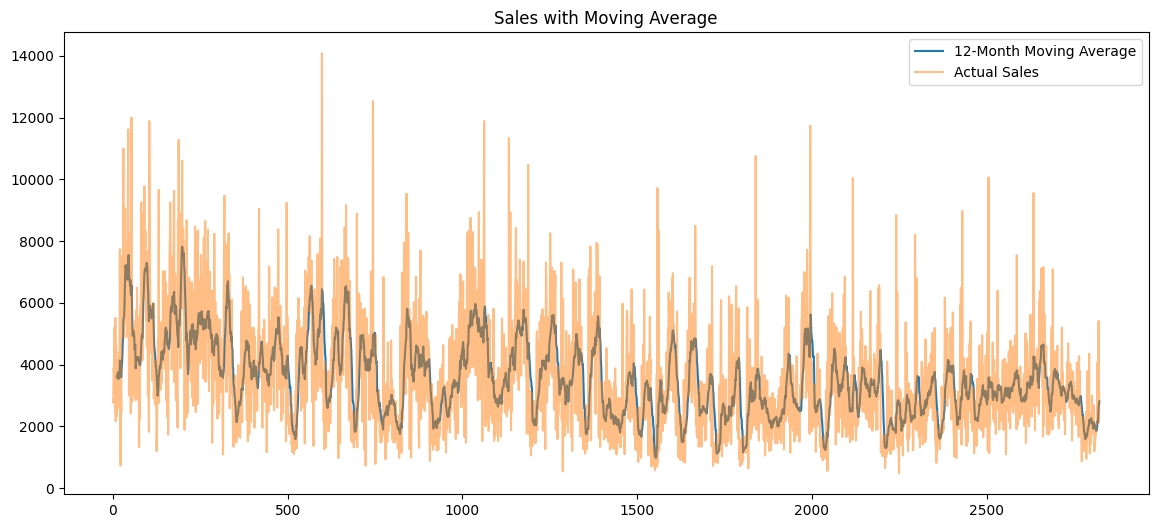

In [19]:
# Plot moving average using correct column name 'SALES'
plt.figure(figsize=(14,6))
df['SALES'].rolling(window=12).mean().plot(label='12-Month Moving Average')
df['SALES'].plot(label='Actual Sales', alpha=0.5)
plt.title('Sales with Moving Average')
plt.legend()
plt.show()

### 🔍 Actual vs Predicted Sales Comparison

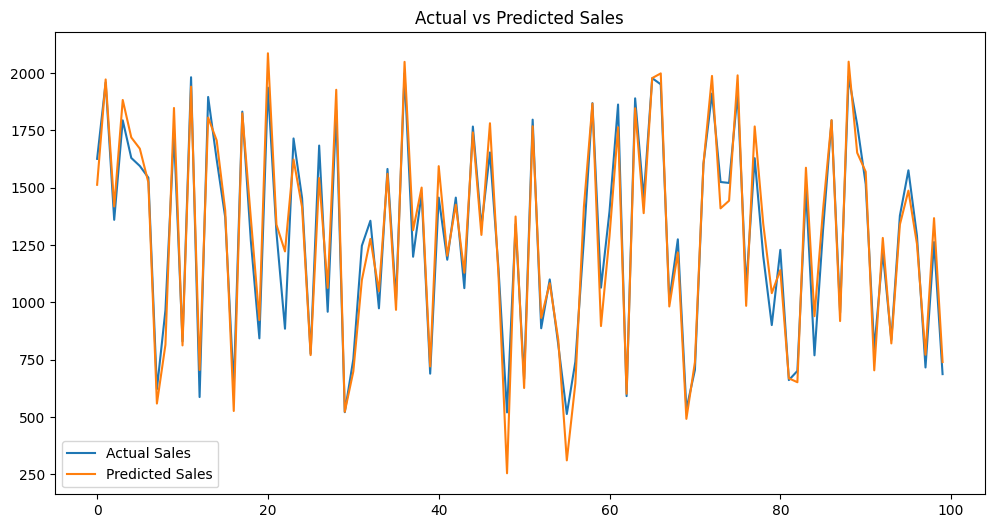

In [17]:
import numpy as np

# Simulate some data
np.random.seed(42)
y_test = np.random.randint(500, 2000, size=100)  # 100 random actual sales
y_pred = y_test + np.random.normal(0, 100, size=100)  # predicted with some noise

# Now plot
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


### 🧮 Residuals (Prediction Errors) Analysis

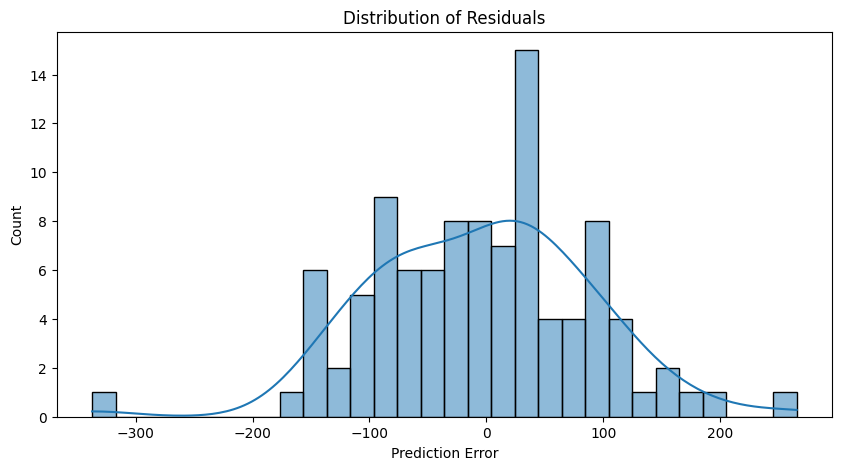

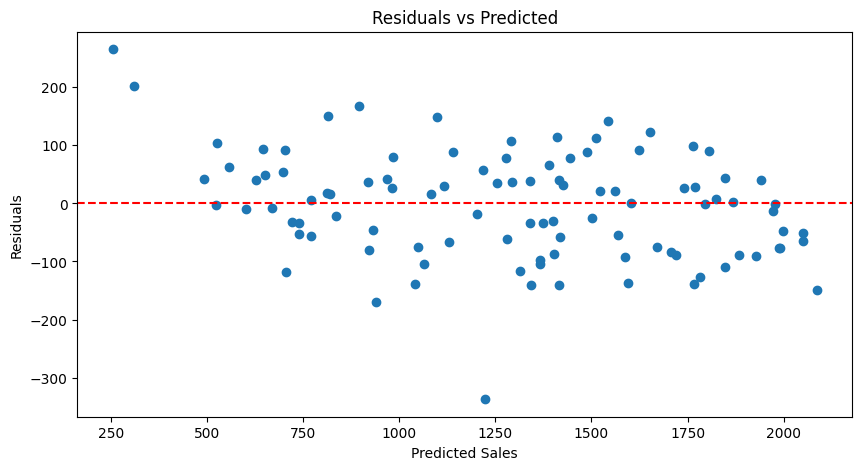

In [18]:
# Residuals = Actual - Predicted
try:
    residuals = y_test - y_pred  # No .values needed

    plt.figure(figsize=(10,5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.title('Distribution of Residuals')
    plt.xlabel('Prediction Error')
    plt.show()

    plt.figure(figsize=(10,5))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals')
    plt.show()
except Exception as e:
    print("Residuals plots could not be generated:", e)